# **EMI Stress Analysis of Approved Loan Borrowers**

# **<h3>1. Introduction**

Even among approved borrowers, certain segments: low to mid income borrowers, short-term loans, debt consolidation or credit card loans, and high revolving credit users carry higher EMI stress and default risk.

Credit grades do not fully capture this vulnerability. Banks need a data driven approach to identify these at-risk borrowers, monitor their repayment behavior, and implement proper measures to reduce defaults.

# **<h3>1. Data Understanding and Cleaning**

**Overview of the dataset**

In [ ]:
describe loan_new;


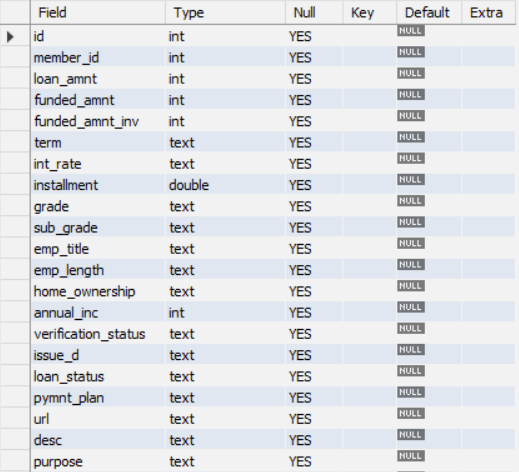

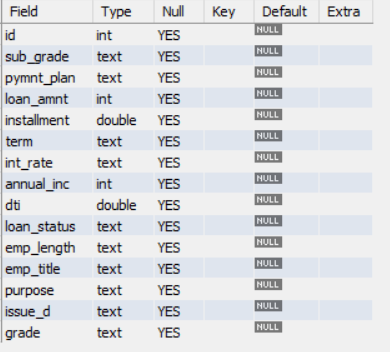

In [ ]:
SELECT COUNT(*) FROM loan_new;
select * from loan_new limit 5;

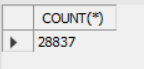

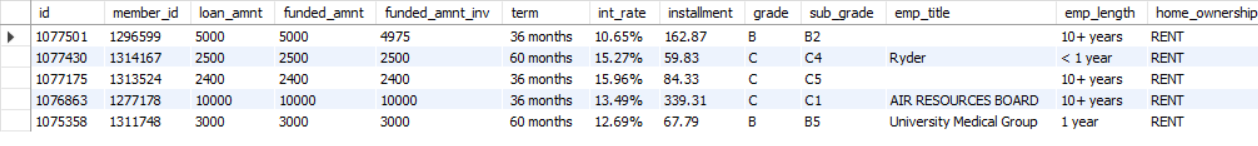

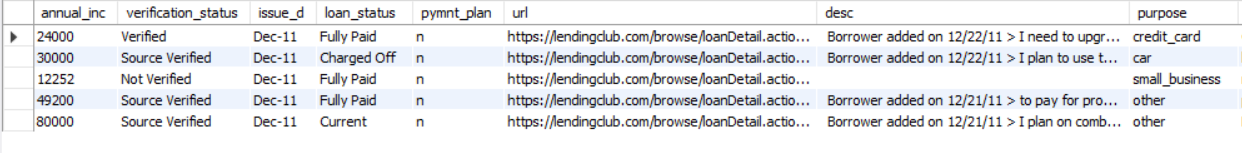

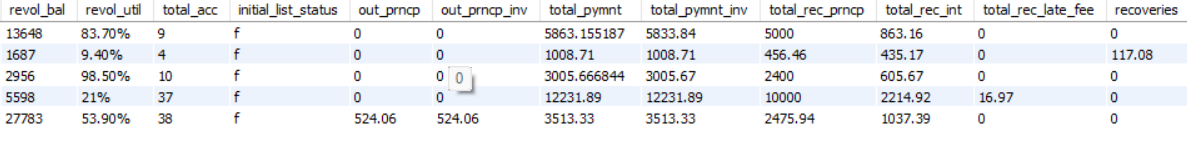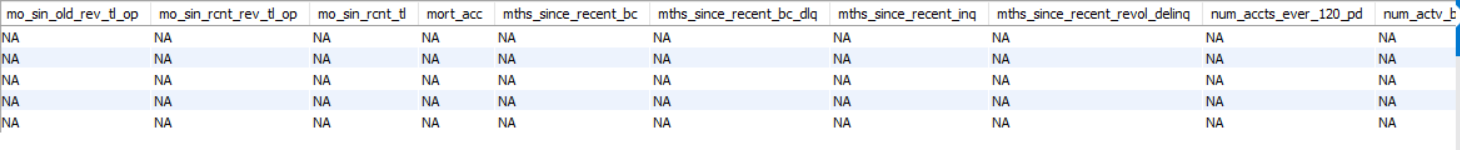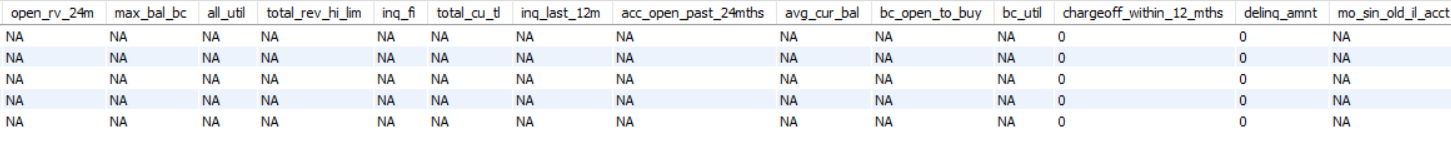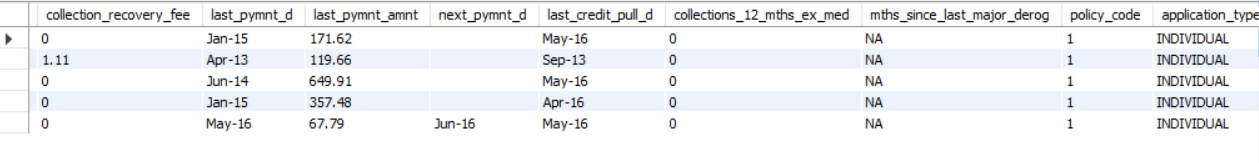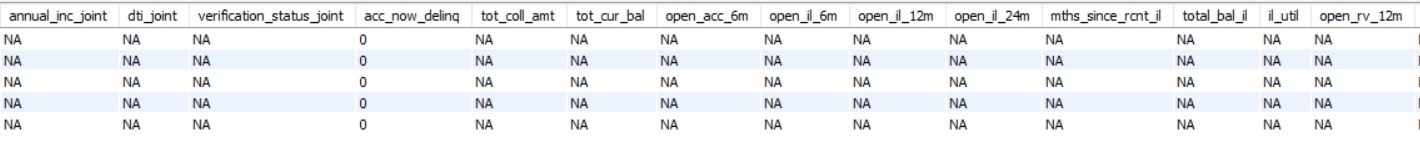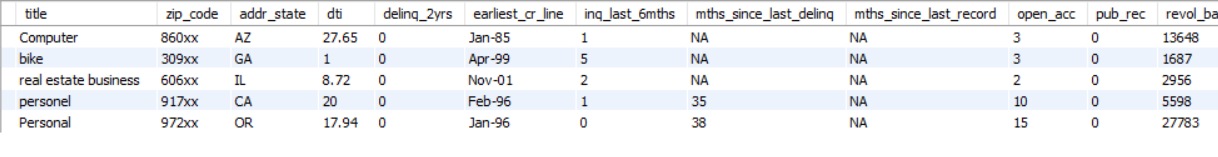

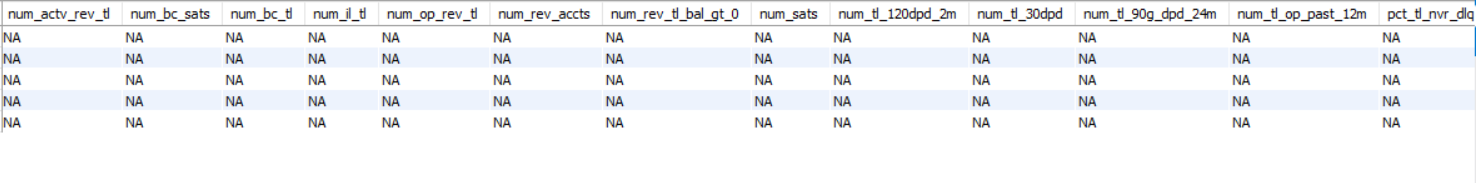



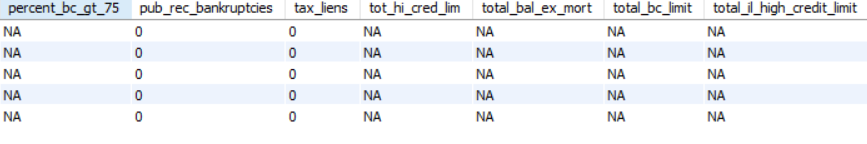

In [ ]:
-- only keeping necessary columns
SHOW COLUMNS FROM loan_new;

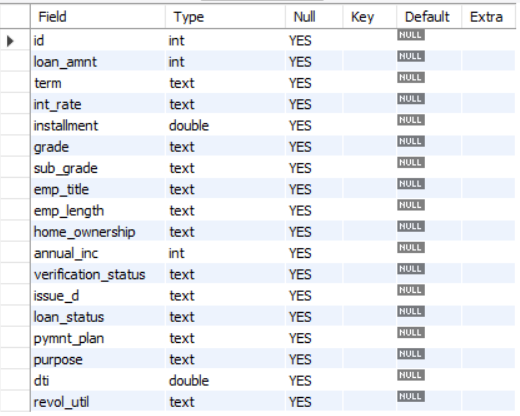

**Correcting the data types of the remaining columns -**

**int_rate**

In [ ]:
UPDATE loan_new
SET int_rate = REPLACE(int_rate, '%', '');

ALTER TABLE loan_new
MODIFY COLUMN int_rate FLOAT;

**issue_d**

In [ ]:
UPDATE loan_new
SET issue_d = STR_TO_DATE(CONCAT('01-', issue_d), '%d-%b-%y')
WHERE issue_d IS NOT NULL;

ALTER TABLE loan_new
MODIFY COLUMN issue_d DATE;

**term**

In [ ]:
UPDATE loan_new
SET term = TRIM(REPLACE(term, 'months', ''));

ALTER TABLE loan_new MODIFY COLUMN term INT;

**installment, annual_inc, dti**

In [ ]:
ALTER TABLE loan_new MODIFY COLUMN installment DECIMAL(10,2);
ALTER TABLE loan_new MODIFY COLUMN annual_inc DECIMAL(12,2);
ALTER TABLE loan_new MODIFY COLUMN dti DECIMAL(5,2);

**grade, sub_grade**

In [ ]:
UPDATE loan_new SET grade = UPPER(TRIM(grade));
UPDATE loan_new SET sub_grade = UPPER(TRIM(sub_grade));

**purpose**

In [ ]:
UPDATE loan_new SET purpose = TRIM(LOWER(purpose));



**emp_title**

In [ ]:
UPDATE loan_new SET emp_title = TRIM(LOWER(emp_title));

**emp_length**

In [ ]:
UPDATE loan_new
SET emp_length = CASE
  WHEN emp_length = '10+ years' THEN '10'
  WHEN emp_length = '9 years' THEN '9'
  WHEN emp_length = '8 years' THEN '8'
  WHEN emp_length = '7 years' THEN '7'
  WHEN emp_length = '6 years' THEN '6'
  WHEN emp_length = '5 years' THEN '5'
  WHEN emp_length = '4 years' THEN '4'
  WHEN emp_length = '3 years' THEN '3'
  WHEN emp_length = '2 years' THEN '2'
  WHEN emp_length = '1 year' THEN '1'
  WHEN emp_length = '< 1 year' THEN '0.5'
  ELSE NULL
END;

ALTER TABLE loan_new MODIFY COLUMN emp_length FLOAT;

**loan_status**

In [ ]:
UPDATE loan_new SET loan_status = TRIM(LOWER(loan_status));

**home_ownership**

In [ ]:
UPDATE loan_new SET home_ownership = UPPER(TRIM(home_ownership));

**verification_status**

In [ ]:
UPDATE loan_new SET verification_status = UPPER(TRIM(verification_status));

**revol_util**

In [ ]:
UPDATE loan_new SET revol_util = REPLACE(revol_util, '%', '');

-- getting error here
ALTER TABLE loan_new MODIFY COLUMN revol_util FLOAT;


-- checking what is wrong in this column
SELECT revol_util
FROM loan_new
WHERE revol_util IS NOT NULL
  AND revol_util NOT REGEXP '^[0-9]+(\.[0-9]+)?$';


-- blank values found, i will set those values to null
UPDATE loan_new
SET revol_util = NULL
WHERE revol_util = ''
   OR revol_util = 'NaN'
   OR revol_util IS NULL
   OR revol_util NOT REGEXP '^[0-9]+(\.[0-9]+)?$';


-- now making the final data type change
ALTER TABLE loan_new MODIFY COLUMN revol_util FLOAT;

**Changing the data types of certain columns from text to varchar**

In [ ]:
ALTER TABLE loan_new
MODIFY COLUMN grade VARCHAR(5),
MODIFY COLUMN sub_grade VARCHAR(5),
MODIFY COLUMN emp_title VARCHAR(100),
MODIFY COLUMN home_ownership VARCHAR(20),
MODIFY COLUMN verification_status VARCHAR(30),
MODIFY COLUMN loan_status VARCHAR(50),
MODIFY COLUMN pymnt_plan VARCHAR(10),
MODIFY COLUMN purpose VARCHAR(50);

**Checking for duplicates**

In [ ]:
SELECT COUNT(*) FROM loan_new;

SELECT COUNT(DISTINCT id) FROM loan_new;

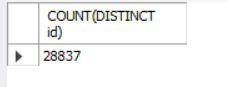

No duplicates are found as the count of the dataset is equal to the distinct count

**Re checking all the columns after making the above changes**

In [ ]:
DESCRIBE loan_new;

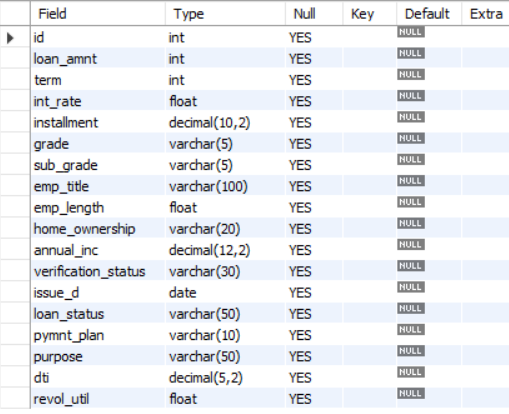

**Checking for any null values**

In [ ]:
SELECT
  COUNT(CASE WHEN id IS NULL OR id = 'na' THEN 1 END) AS id_nulls,
  COUNT(CASE WHEN loan_amnt IS NULL OR loan_amnt = 'na' THEN 1 END) AS loan_amnt_nulls,
  COUNT(CASE WHEN installment IS NULL OR installment = 'na' THEN 1 END) AS installment_nulls,
  COUNT(CASE WHEN term IS NULL OR term = '' OR term = 'na' THEN 1 END) AS term_nulls,
  COUNT(CASE WHEN int_rate IS NULL OR int_rate = '' OR int_rate = 'na' THEN 1 END) AS int_rate_nulls,
  COUNT(CASE WHEN annual_inc IS NULL OR annual_inc = 'na' THEN 1 END) AS annual_inc_nulls,
  COUNT(CASE WHEN dti IS NULL OR dti = 'na' THEN 1 END) AS dti_nulls,
  COUNT(CASE WHEN loan_status IS NULL OR loan_status = '' OR loan_status = 'na' THEN 1 END) AS loan_status_nulls,
  COUNT(CASE WHEN emp_length IS NULL OR emp_length = '' OR emp_length = 'na' THEN 1 END) AS emp_length_nulls,
  COUNT(CASE WHEN emp_title IS NULL OR emp_title = '' OR emp_title IN ('na', 'n/a', 'none') THEN 1 END) AS emp_title_nulls,
  COUNT(CASE WHEN purpose IS NULL OR purpose = 'na' THEN 1 END) AS purpose_nulls,
  COUNT(CASE WHEN issue_d IS NULL THEN 1 END) AS issue_d_nulls,
  COUNT(CASE WHEN grade IS NULL OR grade = '' OR grade = 'na' THEN 1 END) AS grade_nulls,
  COUNT(CASE WHEN sub_grade IS NULL OR sub_grade = '' OR sub_grade = 'na' THEN 1 END) AS sub_grade_nulls,
  COUNT(CASE WHEN home_ownership IS NULL OR home_ownership = '' OR home_ownership = 'na' THEN 1 END) AS home_ownership_nulls,
  COUNT(CASE WHEN verification_status IS NULL OR verification_status = '' OR verification_status = 'na' THEN 1 END) AS verification_status_nulls,
  COUNT(CASE WHEN revol_util IS NULL OR revol_util = '' OR revol_util = 'na' THEN 1 END) AS revol_util_nulls,
  COUNT(CASE WHEN pymnt_plan IS NULL OR pymnt_plan = '' OR pymnt_plan = 'na' THEN 1 END) AS pymnt_plan
FROM loan_new;

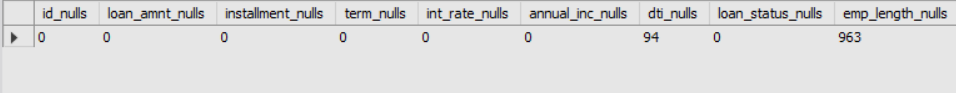

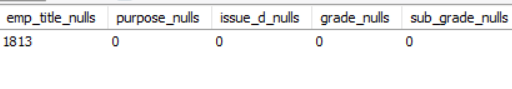

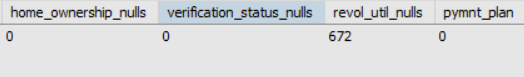

From the above output, dti, emp_length, emp_title and revol_util have null values of 94, 963, 1813 and 672 respectively.
Since my dataset has 28,873 rows in total, for:

**dti :** For this column, I will be imputing with Median as the percentage of missing values is quite low (approx 0.33%)  

**emp_length:** For this column, I have replaced missing values with 'unknown' instead of imputing.

**emp_title:** For this column, I have replaced missing values with 'unknown' instead of imputing.

**revol_util:** For this column, I will be imputing with Median.

**Handling Null Values**

**dti:** roughly seeing the type of distribution to check whether it is left/right skewed or normal distribution, so as to decide whether to impute with mean or median

In [ ]:
SELECT
  CASE
    WHEN dti < 10 THEN '<10'
    WHEN dti BETWEEN 10 AND 20 THEN '10-20'
    WHEN dti BETWEEN 20 AND 30 THEN '20-30'
    WHEN dti BETWEEN 30 AND 50 THEN '30-50'
    WHEN dti >= 50 THEN '50+'
    ELSE 'Missing'
  END AS dti_bucket,
  COUNT(*) AS count
FROM loan_new
GROUP BY dti_bucket
ORDER BY count DESC;

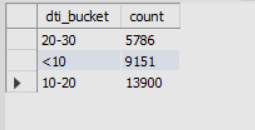

Since the distribution is right skewed, I will impute with median in the dti column.

In [ ]:
SELECT
  dti
FROM (
  SELECT dti,
         ROW_NUMBER() OVER (ORDER BY dti) AS row_num,
         COUNT(*) OVER () AS total_rows
  FROM loan_new
  WHERE dti IS NOT NULL
) AS ordered_dti
WHERE row_num = FLOOR((total_rows + 1) / 2);

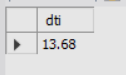

In [ ]:
UPDATE loan_new
SET dti = 13.68
WHERE dti IS NULL ;

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE dti IS NULL;

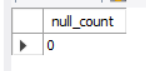

**emp_length :** For this column I replaced the null values with 'unknown'

In [ ]:
ALTER TABLE loan_new
MODIFY COLUMN emp_length VARCHAR(10);

In [ ]:
UPDATE loan_new
SET emp_length = 'unknown'
WHERE emp_length IS NULL OR emp_length IN ('n/a','na', '');

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE emp_length IS NULL;

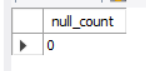

**emp_title**

In [ ]:
UPDATE loan_new
SET emp_title = 'unknown'
WHERE emp_title IS NULL OR emp_title = '';

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE emp_title IS NULL;

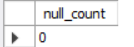

**revol_util**

In [ ]:
-- Get the total number of non-null rows
SELECT COUNT(*) AS non_null_count
FROM loan_new
WHERE revol_util IS NOT NULL;
-- 28817

-- offset = FLOOR(28817 / 2) = 14408  (to get median value)
SELECT revol_util
FROM loan_new
WHERE revol_util IS NOT NULL
ORDER BY revol_util
LIMIT 1 OFFSET 14408;

-- imputing with median
UPDATE loan_new
SET revol_util = 50.7
WHERE revol_util IS NULL;

In [ ]:
SELECT COUNT(*) AS null_count
FROM loan_new
WHERE revol_util IS NULL;

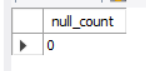